# Import Packages

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import os
from IPython.display import clear_output
import torch, sys
import pandas as pd
import importlib.util
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"  
device = torch.device("cuda:0")
dtype = torch.float32
torch.manual_seed(42)
np.random.seed(42)

In [17]:
import global_config
ns = global_config.test_param_configs['n_tr_list']

# Load p-value Data


In [18]:
df = pd.DataFrame(columns=['label', 'n_tr', 'E[pval]', 'std[pval]', 'color', 'linestyle', 'key', 'soft_or_hard', 'display_flag'])

In [19]:
def clean(A):
    mean = np.mean(A)
    std = np.std(A)
    scores = (A-mean)/std
    return A[np.abs(scores)<0.9]
for key in global_config.method_configs:
    if global_config.method_configs[key]:
        current_dir = sys.path[0]
        config_path = current_dir+'/methods/'+key+'/config.py'
        config_spec = importlib.util.spec_from_file_location('config', config_path)
        config = importlib.util.module_from_spec(config_spec)
        config_spec.loader.exec_module(config)
        pval_path = config.expr_configs['pval_mat_path']
        for n in ns:
            try:
                p_soft_mat = np.load(pval_path+'/n_tr=%d_soft.npy'%n)
                p_hard_mat = np.load(pval_path+'/n_tr=%d_hard.npy'%n)
                new_row_soft = {'label': None, 
                                'n_tr': n, 
                                'E[pval]': np.mean(clean(p_soft_mat)),
                                'std[pval]': np.std(clean(p_soft_mat)),
                                'color': None,
                                'linestyle': None,
                                'key': key,
                                'soft_or_hard': 'soft',
                                'display_flag': False}
                new_row_hard = {'label': None,
                                'n_tr': n,
                                'E[pval]': np.mean(clean(p_hard_mat)),
                                'std[pval]': np.std(clean(p_hard_mat)),
                                'color': None,
                                'linestyle': None,
                                'key': key,
                                'soft_or_hard': 'hard',
                                'display_flag': False}
                df = df.append(new_row_soft, ignore_index=True)
                df = df.append(new_row_hard, ignore_index=True)
                clear_output(wait=True)
            except:
                pass

/tmp/ipykernel_2269061/3360628288.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row_soft, ignore_index=True)
/tmp/ipykernel_2269061/3360628288.py:36: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = df.append(new_row_soft, ignore_index=True)
/tmp/ipykernel_2269061/3360628288.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row_hard, ignore_index=True)
/tmp/ipykernel_2269061/3360628288.py:37: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = df.append(new_row_hard, ignore_index=True)


# Set (label, color, linestyle)

In [20]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

In [21]:
for index, row in df.iterrows():
    if row['key'] == 'Res_Net' and row['soft_or_hard']=='hard':
            df.at[index,'label'] = 'MMD-M with $t_{opt}$'
            df.at[index,'color'] = 'black'; df.at[index,'linestyle'] = '-'
            df.at[index,'display_flag'] = True
    elif row['key'] == 'Res_Net' and row['soft_or_hard']=='soft':
            row['label'] = 'MMD-M'
            df.at[index,'color'] = 'C0'; df.at[index,'linestyle'] = '--'
            df.at[index,'display_flag'] = True
    elif row['key'] == 'Fea_Gau' and row['soft_or_hard']=='soft':
            row['label'] = 'MMD-G'
            df.at[index,'color'] = 'C1'; df.at[index,'linestyle'] = '--'
            df.at[index,'display_flag'] = True
    elif row['key'] == 'Gaussian' and row['soft_or_hard']=='soft':
            row['label'] = 'MMD-O'
            df.at[index,'color'] = 'm'; df.at[index,'linestyle'] = '--'
            df.at[index,'display_flag'] = True
    elif row['key'] == 'Scheffe' and row['soft_or_hard']=='hard':
            row['label'] = 'SCHE with $t_{opt}$'
            df.at[index,'color'] = 'blue'; df.at[index,'linestyle'] = '-'
            df.at[index,'display_flag'] = True
    elif row['key'] == 'Scheffe' and row['soft_or_hard']=='soft':
            row['label'] = 'SCHE with t=0.5'
            df.at[index,'color'] = 'orange'; df.at[index,'linestyle'] = '--'
            df.at[index,'display_flag'] = True
    elif row['key'] == 'LBI' and row['soft_or_hard']=='soft':
            row['label'] = 'LBI'
            df.at[index,'color'] = 'r'; df.at[index,'linestyle'] = '--'
            df.at[index,'display_flag'] = True
    elif row['key'] == 'UME' and row['soft_or_hard']=='soft':
            row['label'] = 'UME'
            df.at[index,'color'] = 'purple'; df.at[index,'linestyle'] = '--'
            df.at[index,'display_flag'] = True
    elif row['key'] == 'RFM' and row['soft_or_hard']=='soft':
            row['label'] = 'RFM'
            df.at[index,'color'] = 'c'; df.at[index,'linestyle'] = '--'
            df.at[index,'display_flag'] = True

# Plot

In [22]:
label_list = ['MMD-M with $t_{opt}$',
              'MMD-M',
              'MMD-G',
              'MMD-O',
              'SCHE with $t_{opt}$',
              'SCHE with t=0.5',
              'LBI',
              'UME',
              'RFM']

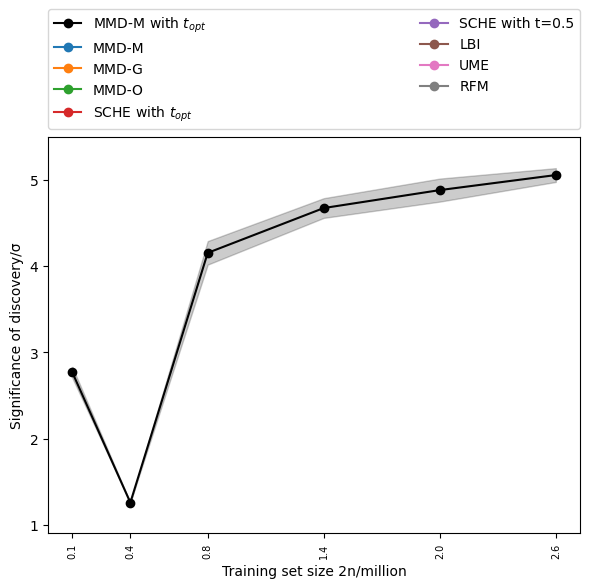

In [23]:
fig = plt.figure(figsize=(6, 6))
for label in label_list:
    filtered_df = df[df['label'] == label]
    mean_list = np.zeros(len(ns))
    std_list = np.zeros(len(ns))
    color = None
    for i, n in enumerate(ns):
        row = filtered_df[filtered_df['n_tr'] == n]
        if row.shape[0] == 1:
            mean_list[i] = row['E[pval]']
            std_list[i] = row['std[pval]']
            color = df.at[index,'color']
        elif row.T.shape[0] > 1:
            pass
        else:
            pass
    plt.plot(ns, mean_list, label=label, marker='o', alpha=0.99, color=color)
    plt.fill_between(ns, mean_list-std_list, mean_list+std_list, alpha=0.2, color=color)
plt.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=2)
plt.xlabel('Training set size 2n/million')
plt.xticks(ns, np.array(ns)*2/10**6)
plt.tick_params(axis='x', which='major', labelsize=7)
plt.xticks(rotation=90)
plt.ylabel('Significance of discovery/σ')
plt.ylim(0.9, 5.5)
plt.tight_layout()


In [24]:
df[df['label'] == 'MMD-M with $t_{opt}$'	]

,label,n_tr,E[pval],std[pval],color,linestyle,key,soft_or_hard,display_flag
1,MMD-M with $t_{opt}$,1300000,5.055654,8.002851e-02,black,-,Res_Net,hard,True
3,MMD-M with $t_{opt}$,1000000,4.881222,1.334968e-01,black,-,Res_Net,hard,True
5,MMD-M with $t_{opt}$,700000,4.673178,1.142563e-01,black,-,Res_Net,hard,True
7,MMD-M with $t_{opt}$,400000,4.153500,1.363954e-01,black,-,Res_Net,hard,True
9,MMD-M with $t_{opt}$,200000,1.258048,2.220446e-16,black,-,Res_Net,hard,True
11,MMD-M with $t_{opt}$,50000,2.767539,6.390492e-02,black,-,Res_Net,hard,True


In [25]:
plt.savefig('./plots/Significance of discovery.pdf')
plt.show()

<Figure size 640x480 with 0 Axes>